In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


In [2]:
np.random.seed(101)

n = 1100

In [3]:
factor1 = np.random.choice([1,2,3,4,5], size=n, p=[.05,.15,.30,.35,.15])
factor2 = np.random.choice([1,2,3,4,5], size=n, p=[.05,.15,.30,.35,.15])
factor3 = np.random.choice([1,2,3,4,5], size=n, p=[.05,.30,.30,.30,.05])

df = pd.DataFrame({'factor1':factor1, 'factor2':factor2, 'factor3':factor3})

for q in ['Q01','Q02','Q03','Q04']:
    df[q] = df['factor1'] + np.random.choice([-2,-1,1,2], size=n)
    df[q] = df[q].map({-1:2, 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:4})

for q in ['Q05','Q06','Q07','Q08']:
    df[q] = df['factor2'] + np.random.choice([-2,-1,1,2], size=n)
    df[q] = df[q].map({-1:2, 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:4})

for q in ['Q09','Q10','Q11','Q12']:
    df[q] = df['factor3'] + np.random.choice([-2,-1,1,2], size=n)
    df[q] = df[q].map({-1:2, 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:4})

In [4]:
factor1 = np.random.choice([1,2,3,4,5], size=n, p=[.05,.15,.30,.35,.15])
factor2 = np.random.choice([1,2,3,4,5], size=n, p=[.05,.30,.35,.15,.15])
factor3 = np.random.choice([1,2,3,4,5], size=n, p=[.10,.35,.25,.25,.05])

df = pd.DataFrame({'factor1':factor1, 'factor2':factor2, 'factor3':factor3})

for q in ['Q01','Q02','Q03','Q04']:
    df[q] = df['factor1'] + np.random.choice([-2,-1,-1,0,0,0,1,1,2], size=n)
    df[q] = df[q].map({-1:2, 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:4})

for q in ['Q05','Q06','Q07','Q08']:
    df[q] = df['factor2'] + np.random.choice([-2,-1,-1,0,0,0,1,1,2], size=n)
    df[q] = df[q].map({-1:2, 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:4})

for q in ['Q09','Q10','Q11','Q12']:
    df[q] = df['factor3'] + np.random.choice([-2,-1,-1,0,0,0,1,1,2], size=n)
    df[q] = df[q].map({-1:2, 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:4})

In [5]:
df.sample(4)

,factor1,factor2,factor3,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,Q11,Q12
423,2,3,2,2,2,3,3,3,3,3,3,3,2,3,1
668,1,4,3,1,2,2,2,5,4,4,5,3,2,2,4
477,2,3,5,1,4,4,1,4,1,4,3,4,4,4,4
564,3,2,1,2,3,4,2,1,2,3,2,2,2,2,1


<Axes: >

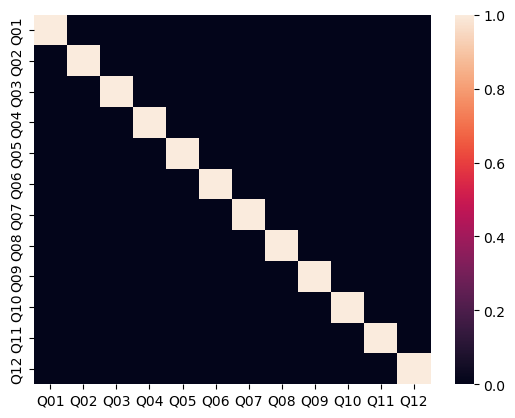

In [6]:
sns.heatmap(df.drop(['factor1','factor2','factor3'], axis=1).corr()  == 1.0)

<Axes: >

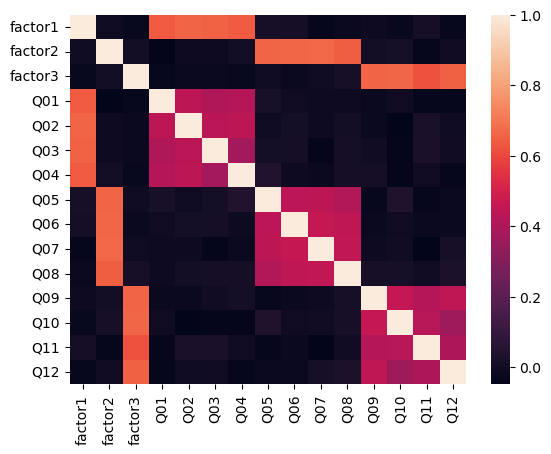

In [7]:
sns.heatmap(df.corr())

In [8]:
chi_square_value,p_value=calculate_bartlett_sphericity(df.drop(['factor1','factor2','factor3'], axis=1))
chi_square_value, round(p_value, 5)

(2824.864951198988, 0.0)

In [9]:
kmo_all,kmo_model=calculate_kmo(df.drop(['factor1','factor2','factor3'], axis=1))
chi_square_value, round(p_value, 5)

(2824.864951198988, 0.0)

In [10]:
fa = FactorAnalyzer()
fa.fit(df.drop(['factor1','factor2','factor3'], axis=1))

pd.DataFrame(fa.get_eigenvalues()).T

,0,1
0,2.335553,1.773139
1,2.313315,1.740028
2,2.190783,1.613779
3,0.681179,0.091552
4,0.637902,0.057507
5,0.609240,0.020421
6,0.581321,0.019814
7,0.575678,-0.003107
8,0.550119,-0.013140
9,0.525001,-0.040415


In [11]:
pd.DataFrame(fa.loadings_)

,0,1,2
0,-0.001566,0.649339,-0.013696
1,-0.002655,0.689556,0.001655
2,-0.003421,0.619916,0.014349
3,0.009888,0.634535,-0.003185
4,0.640536,0.022378,-0.008480
5,0.675624,0.000915,-0.014782
6,0.685705,-0.028598,-0.009261
7,0.652475,0.005940,0.031820
8,-0.005883,0.009544,0.693441
9,0.024575,-0.025423,0.640364
